<a href="https://colab.research.google.com/github/rlackdrhkd/Do-it-deep-learning/blob/main/Do_it_%EB%94%A5%EB%9F%AC%EB%8B%9D_5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer     #training and testing model of logistic regression
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y,
                                                            test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log", random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.8333333333333334

In [4]:
from sklearn.linear_model import SGDClassifier #training and testing to support vector mechine
sgd = SGDClassifier(loss='hinge',random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.9385964912280702

In [4]:
from sklearn.datasets import load_breast_cancer   #ready data set
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y,
                                                            test_size=0.2, random_state=42)

In [5]:
x_train,x_val,y_train,y_val = train_test_split(x_train_all,y_train_all,
                                               stratify=y_train_all, test_size=0.2, random_state=42)  #split up verification set
print(len(x_train),len(x_val))

364 91


In [33]:
sgd = SGDClassifier(loss='log',random_state=42)
sgd.fit(x_train,y_train)
sgd.score(x_val,y_val)

0.6923076923076923

['mean perimeter' 'mean area']


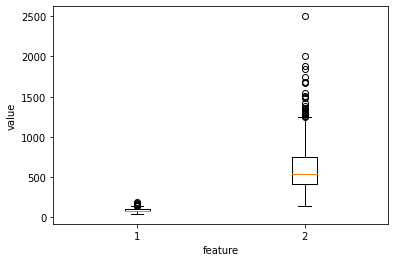

In [34]:
print(cancer.feature_names[[2,3]]) # compare prepared test data 
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [35]:
def __init__(self, learning_rate=0.1): #Add learing rate parameter and variable to record weight
  self.w = None
  self.b = None
  self.losses = []
  self.w_history = []
  self.lr = learning_rate

In [36]:
class SingleLayer:

  def __init__(self, learning_rate=0.1): #Add learing rate parameter and variable to record weight
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self,x):  # Calculation Straight line
    z = np.sum(x*self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err      # Calculation gradient about weight
    b_grad = 1*err      # Calculation gradient about intercept    
    return w_grad, b_grad
  
  def add_bias(self, x): #Adds a column vector filled with 1 at the beginning of the matrix
    return np.c_[np.ones((x.shape[0],1)),x]

  def activation(self,z): #Calculation sigmoid
    a = 1 / (1+ np.exp(-z))
    return a

  def fit(self,x,y,epochs=100):      #Record weight and controll update volume
    self.w = np.ones(x.shape[1])     #resets weight
    self.b = 0                       #resets intercept
    self.w_history.append(self.w.copy())   #record weight
    np.random.seed(42)                     #Desingate randomly seed
    for i in range(epochs):
      loss=0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i],err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a,1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
        self.losses.append(loss/len(y))

  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x] #forpass calculation
    return np.array(z) > 0               #apply stair function

  def score(self,x,y):
    return np.mean(self.predict(x) == y)

In [37]:
layer1 = SingleLayer()
layer1.fit(x_train,y_train)
layer1.score(x_val,y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


0.9120879120879121

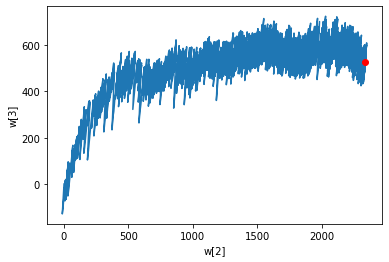

In [38]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [10]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

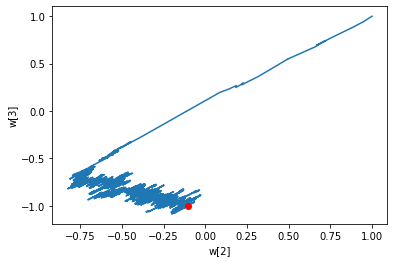

In [40]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [41]:
layer2.score(x_val,y_val)

0.37362637362637363

In [11]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / (val_std)
layer2.score(x_val_scaled, y_val)

NameError: ignored

<function matplotlib.pyplot.show(*args, **kw)>

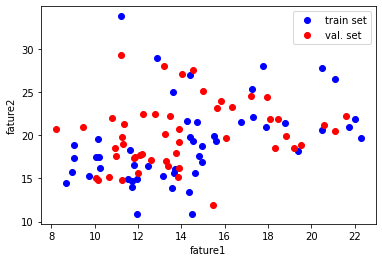

In [43]:
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_val[:50,0],x_val[:50,1],'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val. set'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

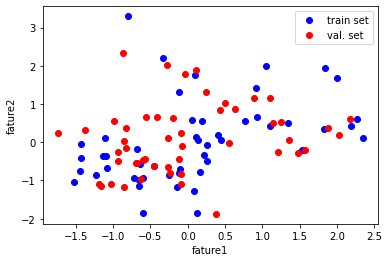

In [44]:
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val. set'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

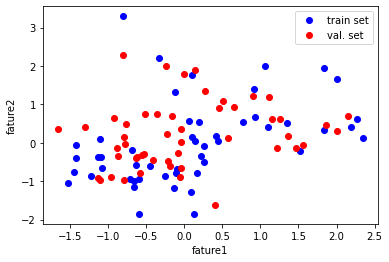

In [11]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val. set'])
plt.show

In [46]:
layer2.score(x_val_scaled,y_val)

0.967032967032967

In [70]:
class SingleLayer:

  def __init__(self, learning_rate=0.1): #Add learing rate parameter and variable to record weight
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses= []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self,x):  # Calculation Straight line
    z = np.sum(x*self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err      # Calculation gradient about weight
    b_grad = 1*err      # Calculation gradient about intercept    
    return w_grad, b_grad
  
  def add_bias(self, x): #Adds a column vector filled with 1 at the beginning of the matrix
    return np.c_[np.ones((x.shape[0],1)),x]

  def activation(self,z): #Calculation sigmoid
    a = 1 / (1+ np.exp(-z))
    return a

  def update_val_loss(self,x_val,y_val):
    if x_val is None:
      return 
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a,1e-10,1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))

  def fit(self,x,y,epochs=100,x_val=None,y_val=None):      #Record weight and controll update volume
    self.w = np.ones(x.shape[1])     #resets weight
    self.b = 0                       #resets intercept
    self.w_history.append(self.w.copy())   #record weight
    np.random.seed(42)                     #Desingate randomly seed
    for i in range(epochs):
      loss=0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i],err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a,1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val,y_val)

  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x] #forpass calculation
    return np.array(z) > 0               #apply stair function

  def score(self,x,y):
    return np.mean(self.predict(x) == y)

In [71]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

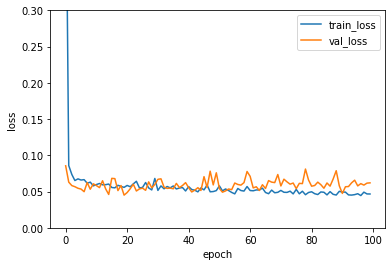

In [72]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [73]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled,y_train,epochs=20)
layer4.score(x_val_scaled,y_val)

0.978021978021978